In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
outlier = pd.read_csv('outlier.csv')

In [3]:
outlier.head()

,id,Income
0,110936,355060
1,41492,315150
2,31300,84140
3,19415,250510
4,99379,198680


In [4]:
outlier.shape

(79853, 2)

In [5]:
outlier.dtypes

id        int64
Income    int64
dtype: object

# Data Analysis

In [6]:
outlier.describe()

,id,Income
count,79853.000000,7.985300e+04
mean,57167.166368,2.088472e+05
std,32928.970160,4.965826e+05
min,2.000000,2.403000e+04
25%,28640.000000,1.080100e+05
50%,57262.000000,1.665600e+05
75%,85632.000000,2.520900e+05
max,114076.000000,9.026260e+07


# Data Preprocessing

In [7]:
outlier['Income'] = outlier['Income'].apply(np.log).round(2)

In [8]:
outlier.describe()

,id,Income
count,79853.000000,79853.000000
mean,57167.166368,12.003769
std,32928.970160,0.660494
min,2.000000,10.090000
25%,28640.000000,11.590000
50%,57262.000000,12.020000
75%,85632.000000,12.440000
max,114076.000000,18.320000


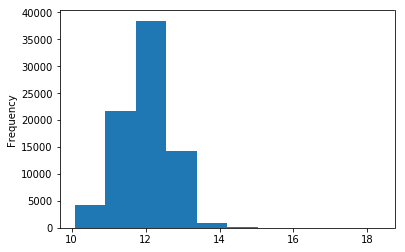

In [9]:
outlier['Income'].plot.hist()

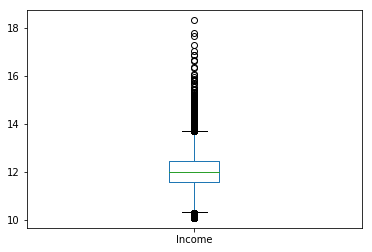

In [10]:
outlier['Income'].plot.box()

# Outlier Detection using IQR method

In [11]:
Q1_Income = outlier['Income'].quantile(0.25)
Q3_Income = outlier['Income'].quantile(0.75)
IQR_Income = Q3_Income  - Q1_Income
upper_Income = Q3_Income + 1.5 * IQR_Income
lower_Income = Q1_Income - 1.5 * IQR_Income
upper_Income, lower_Income

(13.715, 10.315000000000001)

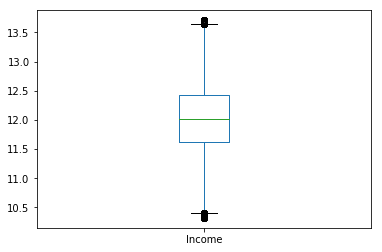

In [12]:
outlier.loc[outlier['Income'] > upper_Income,'Income'] = np.median(outlier['Income']) 
outlier.loc[outlier['Income'] < lower_Income,'Income'] = np.median(outlier['Income']) 
outlier['Income'].plot.box()